<a href="https://colab.research.google.com/github/annakopeikina/-annakopeikina-gEEKbRAIN_end-of-semestr_project/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание. Качество модели и её улучшение

Тебе предстоит разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании. У тебя есть набор данных, который содержит различные признаки о клиентах, такие как возраст, пол, тип подключения, длительность пользования услугами и т.д.

Твоя задача состоит в следующем:

1. Загрузить данные и провести предварительный анализ данных.

2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

3. Разделить данные на обучающую и тестовую выборки.

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

## **1**
_Загрузить данные и провести предварительный анализ данных._

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("telecom_churn.csv")
df.head()

Saving telecom_churn.csv to telecom_churn.csv


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Первичная обработка данных:

1. Удаляем колонку State.

2. Колонки International plan и Voice mail plan кодируем следующим образом: замена Yes  на 1, а No на 0.

3. Перевод целевой переменной (Churn) в числа: True в 1, а False в 0.

In [ ]:
df.drop('State', axis=1, inplace=True)

In [ ]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True: 1, False: 0})

In [ ]:
df.sample(7)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
419,115,415,NaN,NaN,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,0
84,106,510,NaN,NaN,0,210.6,96,35.80,249.2,85,21.18,191.4,88,8.61,12.4,1,3.35,2,1
2617,64,415,NaN,NaN,0,174.5,98,29.67,180.2,103,15.32,179.0,89,8.06,10.7,2,2.89,2,0
2221,120,415,NaN,NaN,0,184.5,103,31.37,209.0,86,17.77,169.7,70,7.64,10.2,6,2.75,2,0
453,149,415,NaN,NaN,20,198.9,77,33.81,274.0,88,23.29,190.7,76,8.58,14.3,9,3.86,1,0
2698,145,415,NaN,NaN,0,175.8,89,29.89,274.3,119,23.32,226.6,69,10.20,12.4,4,3.35,1,0
535,194,408,NaN,NaN,0,48.4,101,8.23,281.1,138,23.89,218.5,87,9.83,18.2,1,4.91,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      0 non-null      float64
 3   Voice mail plan         0 non-null      float64
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [ ]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,NaN,NaN,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,NaN,NaN,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,NaN,NaN,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,NaN,NaN,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,NaN,NaN,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df.isnull().sum()

,0
Account length,0
Area code,0
International plan,3333
Voice mail plan,3333
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0
Total eve calls,0



## __2__
_Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных._

In [ ]:
df.drop(['International plan', 'Voice mail plan'], axis=1, inplace=True)

In [ ]:
df.sample()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2265,126,415,31,278.0,88,47.26,253.2,65,21.52,223.2,114,10.04,8.7,4,2.35,0,0


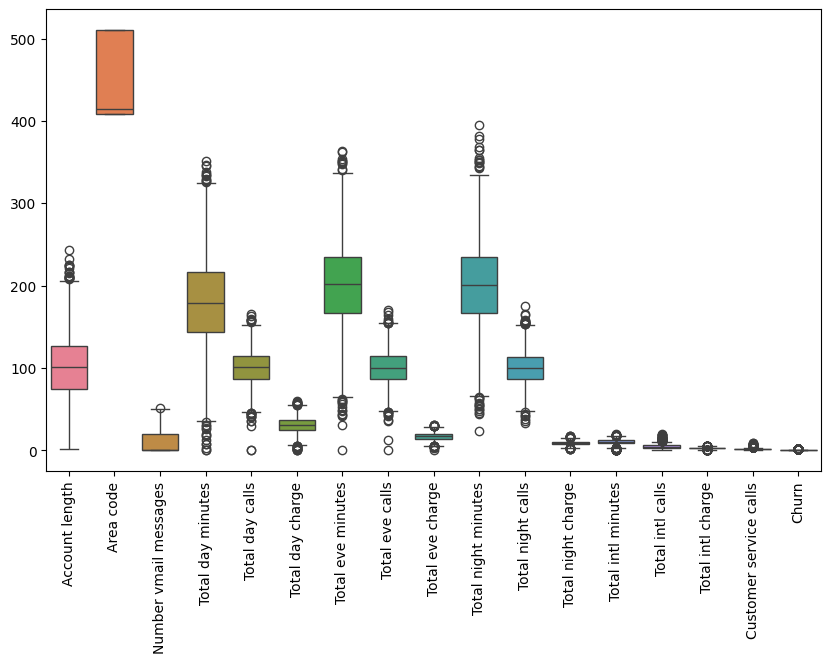

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построить boxplot для всех числовых признаков
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Оценим корреляцию такого признака как Account length по отношению к целевой переменной так как нужно понять какова важность этого признака и является ли он длиною взаимодействия клиента с компанией или же это имеет отношение просто к номеру абонента

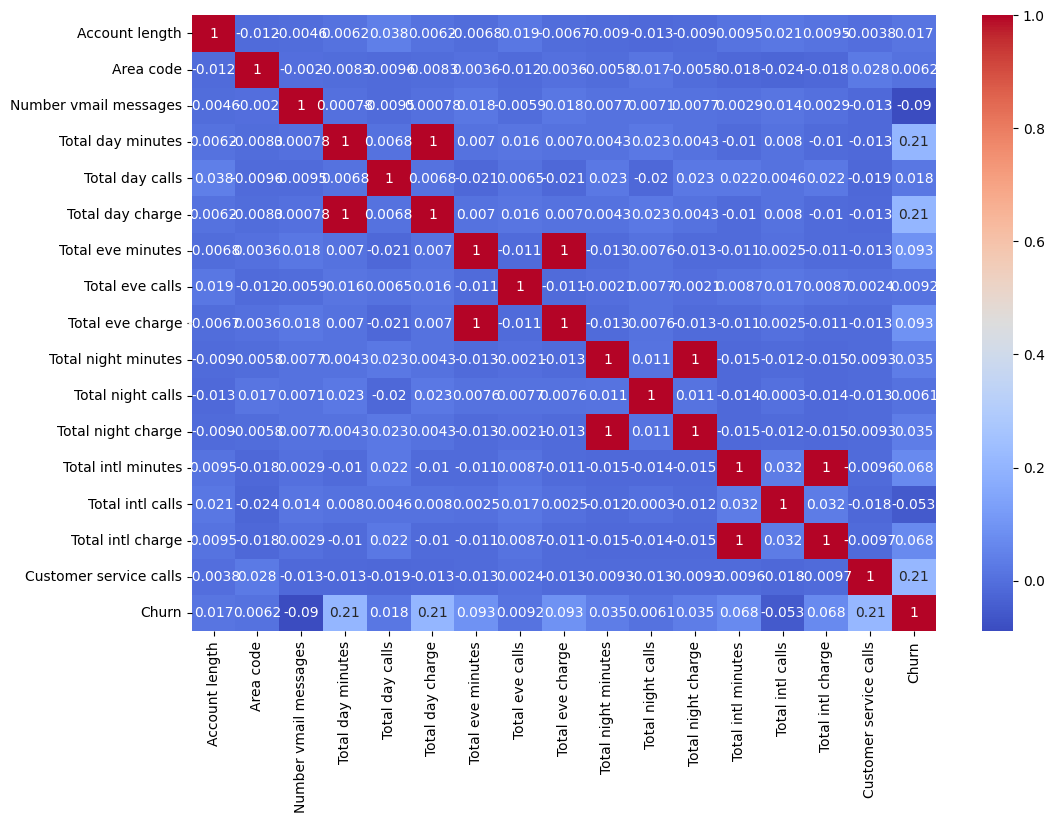

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляция между всеми числовыми признаками
corr_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Низкая корреляция: Значение 0.017 означает, что признак Account length почти не влияет на отток клиентов. Вероятно, клиенты, которые дольше работают с компанией, не проявляют других паттернов оттока по сравнению с новыми клиентами, или этот признак не является информативным для предсказания оттока.

Признак можно исключить:

In [ ]:
df.drop('Account length', axis=1, inplace=True)

Анализ на уровне района: Если в дальнейшем требуется анализ, связанный с географическими данными (например, отток клиентов в зависимости от региона), признак Area code может оказаться полезным для сегментации данных. Возможно, некоторые регионы более склонны к оттоку, что может выявиться только при более детальном анализе, например, через группировки по регионам.

Создание новых признаков: Даже если линейная корреляция с Churn низкая, можно попробовать преобразовать этот признак, например, создать бинарные или категориальные признаки для каждого региона и оценить их влияние на отток через более сложные модели (например, случайный лес или градиентный бустинг), которые могут лучше выявить нелинейные зависимости.

In [ ]:
df = pd.get_dummies(df, columns=['Area code'], drop_first=True)

In [ ]:
# Колонки для нормализации
columns_to_normalize = [
    'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls',
    'Total eve charge', 'Total night minutes', 'Total night calls',
    'Total night charge', 'Total intl minutes', 'Total intl calls',
    'Total intl charge', 'Customer service calls'
]

# Нормализация: замена выбросов на медиану
for column in columns_to_normalize:
    median_value = df[column].median()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Замена выбросов
    df[column] = df[column].apply(
        lambda x: median_value if x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr) else x
    )
print(df)

      Number vmail messages  Total day minutes  Total day calls  \
0                      25.0              265.1            110.0   
1                      26.0              161.6            123.0   
2                       0.0              243.4            114.0   
3                       0.0              299.4             71.0   
4                       0.0              166.7            113.0   
...                     ...                ...              ...   
3328                   36.0              156.2             77.0   
3329                    0.0              231.1             57.0   
3330                    0.0              180.8            109.0   
3331                    0.0              213.8            105.0   
3332                   25.0              234.4            113.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4             99.0             16.78   
1                27.47             

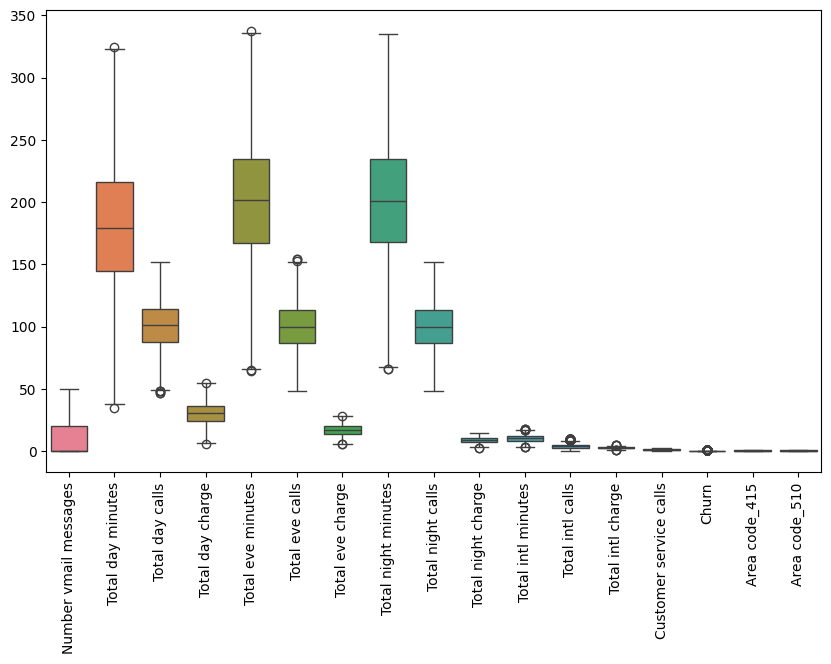

In [ ]:
# Построить boxplot для всех числовых признаков
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## __3__
_Разделить данные на обучающую и тестовую выборки._

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = df.drop('Churn', axis=1)  # Признаки
y = df['Churn']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Подсчёт количества объектов в каждом классе
class_counts = y.value_counts()

# Вывод количества объектов в каждом классе
print(class_counts)


Churn
0    2850
1     483
Name: count, dtype: int64


Несбалансированная выборка.

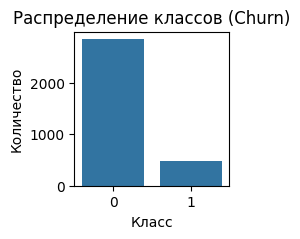

In [ ]:
# Визуализация распределения классов
plt.figure(figsize=(2, 2))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение классов (Churn)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

In [ ]:
# Проверим распределение классов после стратификации
print("Распределение классов в обучающей выборке:", y_train.value_counts(normalize=True))
print("Распределение классов в тестовой выборке:", y_test.value_counts(normalize=True))

Распределение классов в обучающей выборке: Churn
0    0.855214
1    0.144786
Name: proportion, dtype: float64
Распределение классов в тестовой выборке: Churn
0    0.854573
1    0.145427
Name: proportion, dtype: float64


Можно попытаться сбалансировать выборку при помощи весов, но пока попробуем проанализировать в таком виде.

## 4
_Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес._

In [ ]:
# Создание модели случайного леса
model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

алгоритмы на основе деревьев решений (включая случайный лес) не чувствительны к масштабированию признаков

In [ ]:
# Предсказание и оценка модели
y_pred = model.predict(X_test)  # Здесь мы создаем y_pred
print("Точность модели:", accuracy_score(y_test, y_pred))

Точность модели: 0.8950524737631185


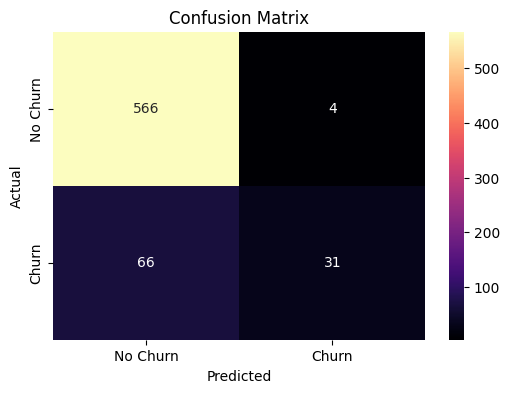

In [ ]:
# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Precision: 0.8857142857142857
Recall: 0.31958762886597936
F1 Score: 0.4696969696969697


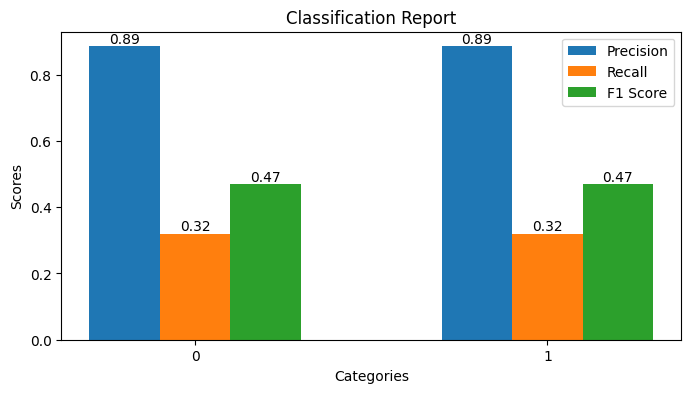

In [ ]:
# Дополнительные метрики
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Визуализация отчета о классификации
plt.figure(figsize=(8, 4))
bar_width = 0.2

plt.bar(x - bar_width, precision, width=bar_width, label='Precision')
plt.bar(x, recall, width=bar_width, label='Recall')
plt.bar(x + bar_width, f1, width=bar_width, label='F1 Score')

# Добавление текстовых значений на график
for i in range(len(categories)):
    plt.text(x[i] - bar_width, precision, f'{precision:.2f}', ha='center', va='bottom')
    plt.text(x[i], recall, f'{recall:.2f}', ha='center', va='bottom')
    plt.text(x[i] + bar_width, f1, f'{f1:.2f}', ha='center', va='bottom')

plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.xticks(x, categories)
plt.legend()
plt.show()

Precision (Точность): 0.886 (или 88.6%)

Это значение показывает, насколько правильно модель предсказывает положительные классы (в вашем случае — отток клиентов).
Из всех клиентов, которых модель предсказала как «уйдут» (положительный класс), 88.6% действительно ушли. Это довольно высокая точность, что означает, что когда модель говорит, что клиент уйдет, она в большинстве случаев права.
Recall (Полнота): 0.320 (или 32.0%)

Это значение показывает, как хорошо модель выявляет все истинные положительные случаи (клиентов, которые действительно уходят).
Из всех клиентов, которые на самом деле ушли, модель правильно идентифицировала только 32%. Это довольно низкий показатель, что означает, что большинство клиентов, которые действительно уходят, остаются незамеченными.
F1 Score: 0.470 (или 47.0%)

F1 Score — это среднее гармоническое между Precision и Recall. Он учитывает как ложные положительные, так и ложные отрицательные результаты, что делает его полезным в ситуациях, когда необходимо сбалансировать между этими двумя метриками.
Значение 47.0% указывает на то, что модель не совсем хороша в предсказаниях. Она имеет высокую точность, но низкую полноту, что приводит к относительно низкому F1 Score.
Выводы
Проблема с полнотой: Основная проблема заключается в низком значении Recall, что указывает на то, что модель не способна выявить значительное количество клиентов, которые действительно уйдут.
Необходимо улучшение: Чтобы улучшить производительность модели, можно рассмотреть следующие шаги:
Настройка порога: изменить порог принятия решений, чтобы увеличить Recall, возможно, жертвуя немного точностью.
Сбалансировка классов: использование методов увеличения данных (oversampling) для положительного класса или уменьшения данных (undersampling) для отрицательного класса.
Изучение других моделей: другие алгоритмы или методы машинного обучения, которые могут лучше выявлять сложные закономерности в данных.
Создание новых признаков: добавить или создать новые признаки, которые могут помочь модели лучше различать клиентов, которые уйдут, и тех, кто останется.

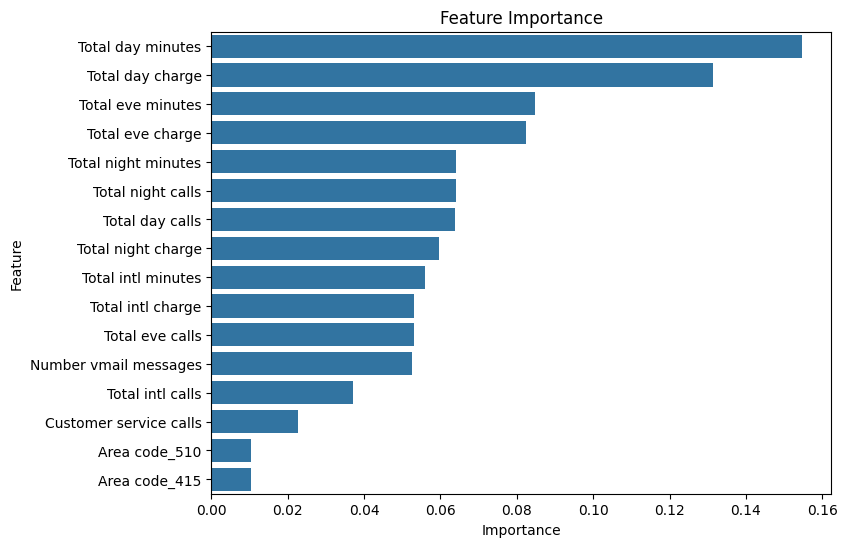

In [ ]:
# Визуализация важности признаков
feature_importances = model.feature_importances_
features = X.columns

# Создание DataFrame для важности признаков
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

Исходя из неудовлетворительности полученных данных прежде чем уравновешивать классы попробуем построить модель логистической регрессии и оценить ее

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Разделите ваши данные на признаки (X) и целевую переменную (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Применение стандартной шкалировки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели логистической регрессии
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Прогнозирование на тестовой выборке
y_pred = log_reg.predict(X_test_scaled)

# Оценка модели
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

Матрица ошибок:
[[343 227]
 [ 38  59]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       570
           1       0.21      0.61      0.31        97

    accuracy                           0.60       667
   macro avg       0.55      0.61      0.51       667
weighted avg       0.80      0.60      0.66       667



True Negatives (TN): 343 (класс 0 правильно классифицирован)
False Positives (FP): 227 (класс 0 неправильно классифицирован как класс 1)
False Negatives (FN): 38 (класс 1 неправильно классифицирован как класс 0)
True Positives (TP): 59 (класс 1 правильно классифицирован)

Precision: Это доля правильно предсказанных положительных случаев среди всех предсказанных положительных случаев.

Класс 0: 0.90 (высокая точность, большинство предсказаний для класса 0 верны)
Класс 1: 0.21 (низкая точность, многие предсказания для класса 1 неверны)
Recall: Это доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.

Класс 0: 0.60 (60% из всех реальных классов 0 были правильно классифицированы)
Класс 1: 0.61 (61% из всех реальных классов 1 были правильно классифицированы)
F1 Score: Это среднее гармоническое Precision и Recall, которое учитывает как точность, так и полноту.

Класс 0: 0.72 (удовлетворительная оценка)
Класс 1: 0.31 (низкая оценка)
Accuracy: Общая доля правильных предсказаний: 0.60 (60% правильных предсказаний по всем классам).
Низкие значения Precision и F1 Score для класса 1:

Это указывает на то, что модель плохо идентифицирует положительные случаи (клиенты, покинувшие компанию).

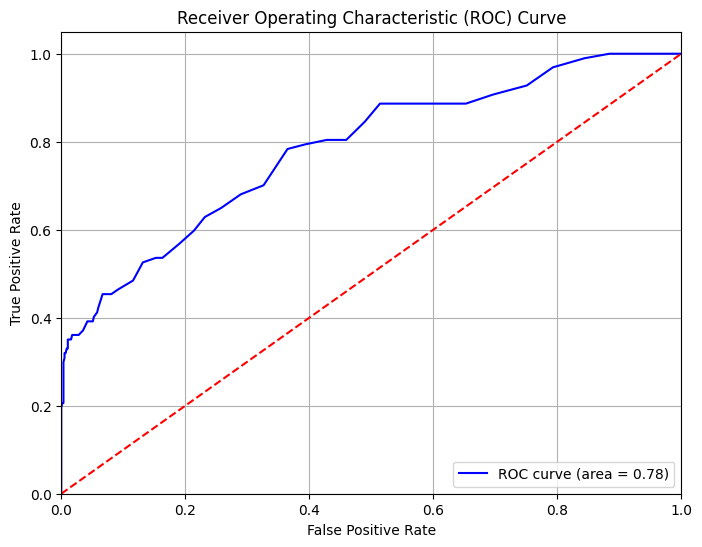

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Получаем вероятности предсказания для класса 1
y_prob = model.predict_proba(X_test)[:, 1]

# Вычисляем FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Вычисляем AUC
roc_auc = auc(fpr, tpr)

# Визуализируем ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного предсказания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Данные показывают, что у наблюдается значительное несоответствие между классами в обеих выборках, где около 85.5% клиентов не покидают компанию (класс 0) и около 14.5% клиентов уходят (класс 1). Это несбалансированное распределение классов может повлиять на качество моделей, так как большинство алгоритмов могут быть предвзяты в пользу более представленного класса.

Проведем балансировку классов при помощи синтезы данных так как в данном случае когда не нужно строго классифицировать данные так как это происходит например при постановке диагноза можем воспользоваться синтезатором SMOTE
SMOTE (Synthetic Minority Over-sampling Technique):

SMOTE генерирует синтетические примеры для меньшего класса, что позволяет увеличить его представительство в данных.
Используйте imblearn для реализации SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Попробуем использовать модель которая хорошо справляется с несбалансированными данными GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_resampled, y_resampled)

GradientBoostingClassifier()

Accuracy: 0.8591
Precision: 0.5231
Recall: 0.3505
F1 Score: 0.4198
Confusion Matrix:
[[539  31]
 [ 63  34]]
ROC AUC: 0.7022


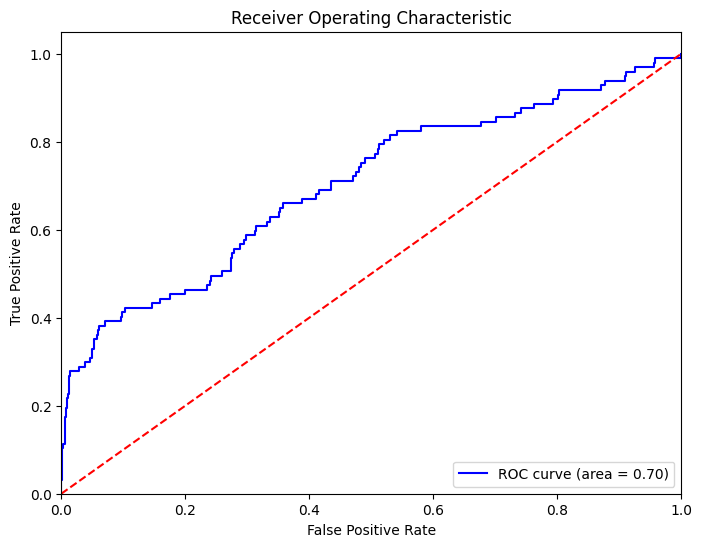

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# Оценка производительности
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Вывод результатов
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'ROC AUC: {roc_auc:.4f}')

# Визуализация ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy (Точность):

0.8591 означает, что 85.91% всех предсказаний модели были правильными. Это хороший общий показатель, но стоит помнить о дисбалансе классов.
Precision (Точность):

0.5231 означает, что из всех положительных предсказаний (класс 1) только 52.31% были верными. Это говорит о том, что модель часто ошибается, когда предсказывает положительный класс.
Recall (Полнота):

0.3505 означает, что из всех фактических положительных примеров (класс 1) модель правильно предсказала только 35.05%. Это низкое значение говорит о том, что модель пропускает много положительных случаев.
F1 Score (F1-мера):

0.4198 - это гармоническое среднее между precision и recall. Значение ниже 0.5 указывает на то, что модель неэффективно справляется с предсказанием положительного класса.
Confusion Matrix (Матрица ошибок):
[[539  31]
 [ 63  34]]
Из 570 истинных примеров класса 0 (отток отсутствует), модель правильно классифицировала 539, но ошиблась с 31 (предсказала, что отток есть).
Из 97 истинных примеров класса 1 (отток есть), модель правильно классифицировала 34, но ошиблась с 63.
ROC AUC:

0.7022 - это значение AUC указывает на то, что модель имеет хорошую способность различать классы. Значения близкие к 1 показывают, что модель лучше справляется с задачей.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df_ensembled = pd.read_csv("telecom_churn.csv")
df_ensembled.head()

Saving telecom_churn.csv to telecom_churn (5).csv


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
import pandas as pd

# Предполагается, что df_resampling уже создан и содержит данные
# Преобразование категориальных переменных
df_resampling['International plan'] = df_resampling['International plan'].map({'Yes': 1, 'No': 0})
df_resampling['Voice mail plan'] = df_resampling['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_resampling['Churn'] = df_resampling['Churn'].map({True: 1, False: 0})

# Удаление ненужных столбцов
df_resampling.drop(['International plan', 'Voice mail plan', 'Account length'], axis=1, inplace=True)

# Создание дамми-переменных для 'Area code' (предполагается, что столбец существует)
if 'Area code' in df_resampling.columns:
    df_resampling = pd.get_dummies(df_resampling, columns=['Area code'], drop_first=True)

# Нормализация: замена выбросов на медиану
columns_to_normalize = [
    'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls',
    'Total eve charge', 'Total night minutes', 'Total night calls',
    'Total night charge', 'Total intl minutes', 'Total intl calls',
    'Total intl charge', 'Customer service calls'
]

for column in columns_to_normalize:
    median_value = df_resampling[column].median()
    q1 = df_resampling[column].quantile(0.25)
    q3 = df_resampling[column].quantile(0.75)
    iqr = q3 - q1

    # Замена выбросов
    df_resampling[column] = df_resampling[column].apply(
        lambda x: median_value if x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr) else x
    )

# Проверка результата
print(df_resampling.sample(3))

# Создание новых признаков
df_resampling['Total minutes'] = (df_resampling['Total day minutes'] +
                                   df_resampling['Total eve minutes'] +
                                   df_resampling['Total night minutes'] +
                                   df_resampling['Total intl minutes'])

df_resampling['Total calls'] = (df_resampling['Total day calls'] +
                                 df_resampling['Total eve calls'] +
                                 df_resampling['Total night calls'] +
                                 df_resampling['Total intl calls'])

df_resampling['Total charges'] = (df_resampling['Total day charge'] +
                                   df_resampling['Total eve charge'] +
                                   df_resampling['Total night charge'] +
                                   df_resampling['Total intl charge'])

# Проверка наличия 'Total calls' перед созданием новых признаков
if 'Total calls' in df_resampling.columns and df_resampling['Total calls'].sum() > 0:
    df_resampling['Average call duration'] = df_resampling['Total minutes'] / df_resampling['Total calls']
    df_resampling['Intl call ratio'] = df_resampling['Total intl calls'] / df_resampling['Total calls']
    df_resampling['Day call ratio'] = df_resampling['Total day calls'] / df_resampling['Total calls']
    df_resampling['Day-Eve call diff'] = df_resampling['Total day calls'] - df_resampling['Total eve calls']
    df_resampling['Service call frequency'] = df_resampling['Customer service calls'] / df_resampling['Total calls']

# Проверка финального DataFrame
print(df_resampling.head())

     State  Number vmail messages  Total day minutes  Total day calls  \
1966    NE                    0.0              169.4            102.0   
731     WY                    0.0              207.2            121.0   
2099    MA                    0.0              290.4            108.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
1966             28.80              184.9            144.0             15.72   
731              35.22              292.5            104.0             24.86   
2099             49.37              253.9             92.0             21.58   

      Total night minutes  Total night calls  Total night charge  \
1966                234.3               89.0               10.54   
731                 226.3              103.0               10.18   
2099                263.3              126.0               11.85   

      Total intl minutes  Total intl calls  Total intl charge  \
1966                10.3               7.0      

In [ ]:
df_resampling.sample(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2220,DE,87,415,No,No,0,177.2,72,30.12,248.9,105,21.16,200.8,87,9.04,8.6,7,2.32,3,False
1567,WV,94,415,No,No,0,85.9,113,14.60,226.7,91,19.27,279.6,110,12.58,15.6,16,4.21,0,False
1427,RI,176,415,No,No,0,250.9,108,42.65,171.4,100,14.57,148.6,85,6.69,9.6,6,2.59,2,False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Удаляем старые столбцы, используемые для создания новых признаков
columns_to_drop = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes',
    'Total intl minutes', 'Total day calls', 'Total eve calls',
    'Total night calls', 'Total intl calls',
    'Total day charge', 'Total eve charge',
    'Total night charge', 'Total intl charge',
    'Customer service calls'
]

df_resampling.drop(columns=columns_to_drop, inplace=True)

if 'Churn' in df_resampling.columns:
    df_resampling['Churn'] = df_resampling['Churn'].map({True: 1, False: 0})

# Преобразование категориальных переменных в дамми-переменные
categorical_cols = df_resampling.select_dtypes(include=['object']).columns
df_resampling = pd.get_dummies(df_resampling, columns=categorical_cols, drop_first=True)

# Разделяем данные на признаки и целевую переменную
X = df_resampling.drop('Churn', axis=1)
y = df_resampling['Churn']

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели градиентного бустинга
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Показать несколько прогнозов
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       566
           1       0.27      0.04      0.07       101

    accuracy                           0.84       667
   macro avg       0.56      0.51      0.49       667
weighted avg       0.76      0.84      0.78       667

Confusion Matrix:
 [[555  11]
 [ 97   4]]
ROC AUC Score: 0.6307770353007032
      Actual  Predicted
438        0          0
2674       0          0
1345       1          0
1957       0          0
2148       0          0


модель имеет высокую точность для класса 0 (клиенты, которые не покинули компанию), но значительно более низкую точность и полноту для класса 1 (клиенты, которые покинули компанию)
Класс 0 (не покинувшие):
Precision: 0.85 — из всех предсказанных 0, 85% действительно являются 0.
Recall: 0.98 — из всех реальных 0, модель правильно классифицировала 98%.
F1-Score: 0.91 — взвешенная гармоническая средняя precision и recall.
Класс 1 (покинувшие):
Precision: 0.27 — из всех предсказанных 1, только 27% действительно являются 1.
Recall: 0.04 — из всех реальных 1, модель правильно классифицировала только 4%.
F1-Score: 0.07 — очень низкий результат, указывающий на слабую производительность для этого класса.
2. Матрица ошибок
True Negatives (TN): 555 — количество правильно предсказанных классов 0.
False Positives (FP): 11 — количество неправильно предсказанных классов 1 вместо 0.
False Negatives (FN): 97 — количество неправильно предсказанных классов 0 вместо 1.
True Positives (TP): 4 — количество правильно предсказанных классов 1.
3. ROC AUC Score
Значение 0.63 говорит о том, что модель имеет некоторую способность различать классы, но она далеко от идеального значения 1. Это может указывать на необходимость улучшения модели.

In [ ]:
%time
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

target_column = 'Churn'

X = df_resampling.drop(columns=[target_column])
y = df_resampling[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 5, 7],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разбиения
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC AUC Score:", grid_search.best_score_)

# Прогнозирование на тестовых данных с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оцените модель
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


X = df_resampling.drop(columns=['Churn'])
y = df_resampling['Churn']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# модель
model = GradientBoostingClassifier(random_state=42)

# параметры для Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 5, 7],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разбиения
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC AUC Score:", grid_search.best_score_)

# Прогнозирование на тестовых данных с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Лучший ROC AUC Score: 0.6658567981022778
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667

Confusion Matrix:
 [[566   0]
 [100   1]]
ROC AUC Score: 0.6530367701081061
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Лучший ROC AUC Score: 0.6658567981022778
Classification Report:
               precision    recall  f1-score   support

           0    

In [ ]:
%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample

df_balanced = df_resampling.copy()

# Сравниваем количество образцов в каждом классе
class_counts = df_balanced['Churn'].value_counts()
print("Количество образцов в каждом классе перед балансировкой:")
print(class_counts)

# Разделим данные на классы
df_majority = df_balanced[df_balanced['Churn'] == 0]
df_minority = df_balanced[df_balanced['Churn'] == 1]

# Уменьшаем класс большинства
df_majority_downsampled = resample(df_majority,
                                    replace=False,  # Без замены
                                    n_samples=len(df_minority),  # До количества класса меньшинства
                                    random_state=42)  # Для воспроизводимости

# Объединяем меньшинство и уменьшенный класс большинства
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Проверяем сбалансированность классов
print("\nКоличество образцов в каждом классе после балансировки:")
print(df_balanced['Churn'].value_counts())

# Разделяем данные на признаки и целевую переменную
X = df_balanced.drop(columns=['Churn'])
y = df_balanced['Churn']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование и оценка модели Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Обучение модели SVM
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Прогнозирование и оценка модели SVM
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Количество образцов в каждом классе перед балансировкой:
Churn
0    2850
1     483
Name: count, dtype: int64

Количество образцов в каждом классе после балансировки:
Churn
0    483
1    483
Name: count, dtype: int64

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        87
           1       0.75      0.64      0.69       107

    accuracy                           0.68       194
   macro avg       0.68      0.69      0.68       194
weighted avg       0.69      0.68      0.68       194

Confusion Matrix:
[[64 23]
 [39 68]]
ROC AUC Score: 0.7167257492748952

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.66      0.54        87
           1       0.57      0.36      0.44       107

    accuracy                           0.49       194
   macro avg       0.51      0.51     

1. Балансировка классов
Перед балансировкой количество образцов в классах:

Класс 0 (не ушли): 2850
Класс 1 (ушли): 483
После балансировки классов методом undersampling (уменьшение количества образцов в классе 0):

Класс 0: 483
Класс 1: 483
Это устранило дисбаланс между классами и позволило модели лучше учитывать оба класса.

Результаты для Random Forest:
Accuracy (точность): 0.68 (модель правильно классифицировала 68% всех примеров).

Precision (точность):

Класс 0: 0.62 — 62% предсказанных примеров класса 0 верны.
Класс 1: 0.75 — 75% предсказанных примеров класса 1 верны.
Recall (полнота):

Класс 0: 0.74 — модель правильно классифицировала 74% примеров класса 0.
Класс 1: 0.64 — модель правильно классифицировала 64% примеров класса 1.
F1-Score:

Класс 0: 0.67 — среднее гармоническое между точностью и полнотой.
Класс 1: 0.69 — хороший баланс между точностью и полнотой для класса 1.
Confusion Matrix (Матрица ошибок):

[[64 23]  <- Класс 0: 64 правильно классифицировано, 23 ошибки.
 [39 68]] <- Класс 1: 68 правильно классифицировано, 39 ошибки.
ROC AUC Score: 0.7167 — модель имеет хорошую способность различать классы. Значение больше 0.7 указывает на хорошую производительность.

Результаты для SVM:
Accuracy (точность): 0.49 (SVM правильно классифицировала 49% примеров).

Precision:

Класс 0: 0.46 — модель верно классифицировала 46% предсказанных примеров класса 0.
Класс 1: 0.57 — 57% предсказанных примеров класса 1 верны.
Recall (полнота):

Класс 0: 0.66 — модель правильно классифицировала 66% примеров класса 0.
Класс 1: 0.36 — модель смогла правильно классифицировать лишь 36% примеров класса 1.
F1-Score:

Класс 0: 0.54 — модель немного лучше при предсказании класса 0.
Класс 1: 0.44 — указывает на слабое предсказание класса 1.
Confusion Matrix (Матрица ошибок):

[[57 30]  <- Класс 0: 57 правильно классифицировано, 30 ошибки.
 [68 39]] <- Класс 1: 39 правильно классифицировано, 68 ошибки.
ROC AUC Score: 0.4506 — модель SVM плохо различает классы, значение ниже 0.5 показывает низкую производительность.

Итоги:
Random Forest показал лучшую производительность с ROC AUC Score 0.72 и хорошим балансом между точностью и полнотой.
SVM справился хуже, с ROC AUC Score 0.45, низкой точностью и полнотой для класса 1, что делает его менее предпочтительным для данной задачи.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
uploaded = files.upload()
df_folded = pd.read_csv("telecom_churn.csv")


Saving telecom_churn.csv to telecom_churn (2).csv


In [ ]:
df_folded['International plan'] = df_folded['International plan'].map({'Yes': 1, 'No': 0})
df_folded['Voice mail plan'] = df_folded['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_folded['Churn'] = df_folded['Churn'].map({True: 1, False: 0})

# Удаление ненужных столбцов
df_folded.drop(['International plan', 'Voice mail plan', 'Account length'], axis=1, inplace=True)

# Создание дамми-переменных для 'Area code' (предполагается, что столбец существует)
if 'Area code' in df_folded.columns:
    df_folded = pd.get_dummies(df_folded, columns=['Area code'], drop_first=True)

# Нормализация: замена выбросов на медиану
columns_to_normalize = [
    'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls',
    'Total eve charge', 'Total night minutes', 'Total night calls',
    'Total night charge', 'Total intl minutes', 'Total intl calls',
    'Total intl charge', 'Customer service calls'
]

for column in columns_to_normalize:
    median_value = df_folded[column].median()
    q1 = df_folded[column].quantile(0.25)
    q3 = df_folded[column].quantile(0.75)
    iqr = q3 - q1

    # Замена выбросов
    df_folded[column] = df_folded[column].apply(
        lambda x: median_value if x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr) else x
    )

# Проверка результата
print(df_folded.sample(3))

# Создание новых признаков
df_folded['Total minutes'] = (df_folded['Total day minutes'] +
                                   df_folded['Total eve minutes'] +
                                   df_folded['Total night minutes'] +
                                   df_folded['Total intl minutes'])

df_folded['Total calls'] = (df_folded['Total day calls'] +
                                 df_folded['Total eve calls'] +
                                 df_folded['Total night calls'] +
                                 df_folded['Total intl calls'])

df_folded['Total charges'] = (df_folded['Total day charge'] +
                                   df_folded['Total eve charge'] +
                                   df_folded['Total night charge'] +
                                   df_folded['Total intl charge'])

# Проверка наличия 'Total calls' перед созданием новых признаков
if 'Total calls' in df_folded.columns and df_folded['Total calls'].sum() > 0:
    df_folded['Average call duration'] = df_folded['Total minutes'] / df_folded['Total calls']
    df_folded['Intl call ratio'] = df_folded['Total intl calls'] / df_folded['Total calls']
    df_folded['Day call ratio'] = df_folded['Total day calls'] / df_folded['Total calls']
    df_folded['Day-Eve call diff'] = df_folded['Total day calls'] - df_folded['Total eve calls']
    df_folded['Service call frequency'] = df_folded['Customer service calls'] / df_folded['Total calls']

# Проверка финального DataFrame
print(df_folded.head())



     State  Number vmail messages  Total day minutes  Total day calls  \
1397    VT                    0.0              179.4            101.0   
2658    DC                    0.0              257.3             84.0   
1084    KY                    0.0              255.9             97.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
1397             30.50              192.1            119.0             16.33   
2658             43.74              184.8            115.0             15.71   
1084             43.50              204.1            129.0             17.35   

      Total night minutes  Total night calls  Total night charge  \
1397                168.8               95.0                7.60   
2658                108.9              109.0                4.90   
1084                171.3               84.0                7.71   

      Total intl minutes  Total intl calls  Total intl charge  \
1397                 7.2               4.0      

In [ ]:
# Отделение признаков и целевой переменной (Churn)
X = df_folded.drop('Churn', axis=1)  # Все столбцы, кроме Churn
y = df_folded['Churn']  # Целевая переменная

# Преобразуем категориальные признаки в числовые, если еще не сделано
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Настройка K-fold (например, с 5 фолдами)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Модель - случайный лес
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Массив для хранения точностей
accuracies = []
roc_aucs = []

In [ ]:
# Проходим по каждому фолду
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Обучение модели
    model.fit(X_train, y_train)

    # Прогнозирование
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Оценка точности и AUC
    accuracies.append(accuracy_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred_prob))

# Выводим среднюю точность и AUC по фолдам
print(f'Средняя точность: {np.mean(accuracies):.4f}')
print(f'Средний AUC-ROC: {np.mean(roc_aucs):.4f}')

Средняя точность: 0.9052
Средний AUC-ROC: 0.7676


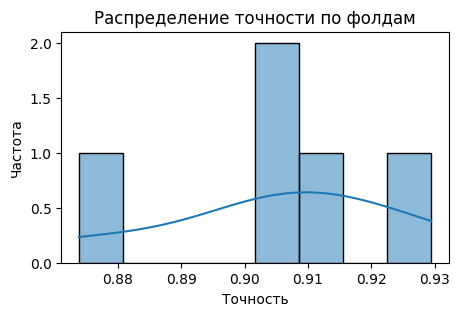

In [ ]:
# Построим график распределения точности по фолдам
plt.figure(figsize=(5, 3))
sns.histplot(accuracies, kde=True)
plt.title('Распределение точности по фолдам')
plt.xlabel('Точность')
plt.ylabel('Частота')
plt.show()

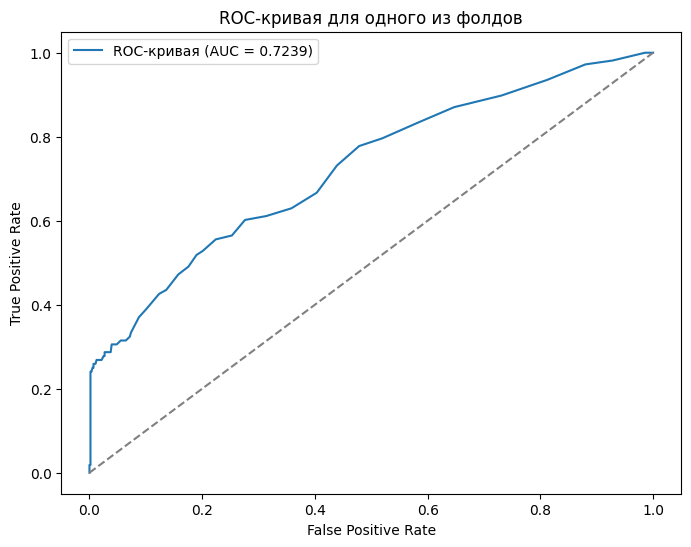

In [ ]:
# Для примера возьмём один из фолдов (последний) и построим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC-кривая для одного из фолдов')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

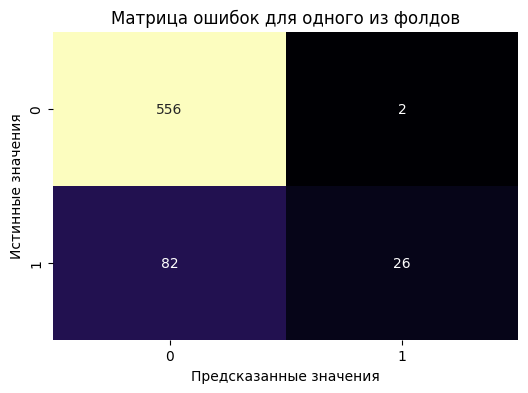

In [ ]:
# Матрица ошибок для одного из фолдов
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False)
plt.title('Матрица ошибок для одного из фолдов')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

Сохранение признака Accaunt length дало чуть более точные результаты. Средняя точность 0.9052 и средний AUC-ROC 0.7676 показывают, что модель случайного леса на этом наборе данных довольно хорошо предсказывает метку "Churn" (с вероятностью около 90% в среднем по фолдам). Однако AUC-ROC в 0.7676 говорит о том, что модель имеет определенные трудности с разделением классов в терминах истинных и ложных положительных предсказаний.

Точность (Accuracy): Это доля верных предсказаний от общего числа предсказаний. Значение 0.9052 указывает на то, что модель делает очень мало ошибок.
AUC-ROC (Area Under the Curve - Receiver Operating Characteristic): Эта метрика более чувствительна к несбалансированным классам и показывает способность модели различать классы (зависимость между истинными положительными и ложными положительными результатами). Значение 0.7676 говорит о том, что модель в целом хорошо различает классы, но не идеально.
Возможные выводы:
Модель демонстрирует высокую точность, что свидетельствует о ее сильных предсказательных способностях.
AUC-ROC ниже, чем хотелось бы для задач, связанных с классификацией "Churn". Это означает, что могут быть ложные срабатывания (False Positives), и модель может пропускать случаи, где клиент не откажется, или наоборот.

In [ ]:
%time
from sklearn.model_selection import GridSearchCV

# Задаем параметры для поиска
param_grid = {
    'n_estimators': [100, 200, 300],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разбиения узла
    'min_samples_leaf': [1, 2, 4]     # Минимальное количество образцов в листе
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Обучаем модель с подбором параметров
grid_search.fit(X, y)

# Выводим лучшие параметры
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая точность: ", grid_search.best_score_)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.7 µs
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Лучшая точность:  0.9075957516737126


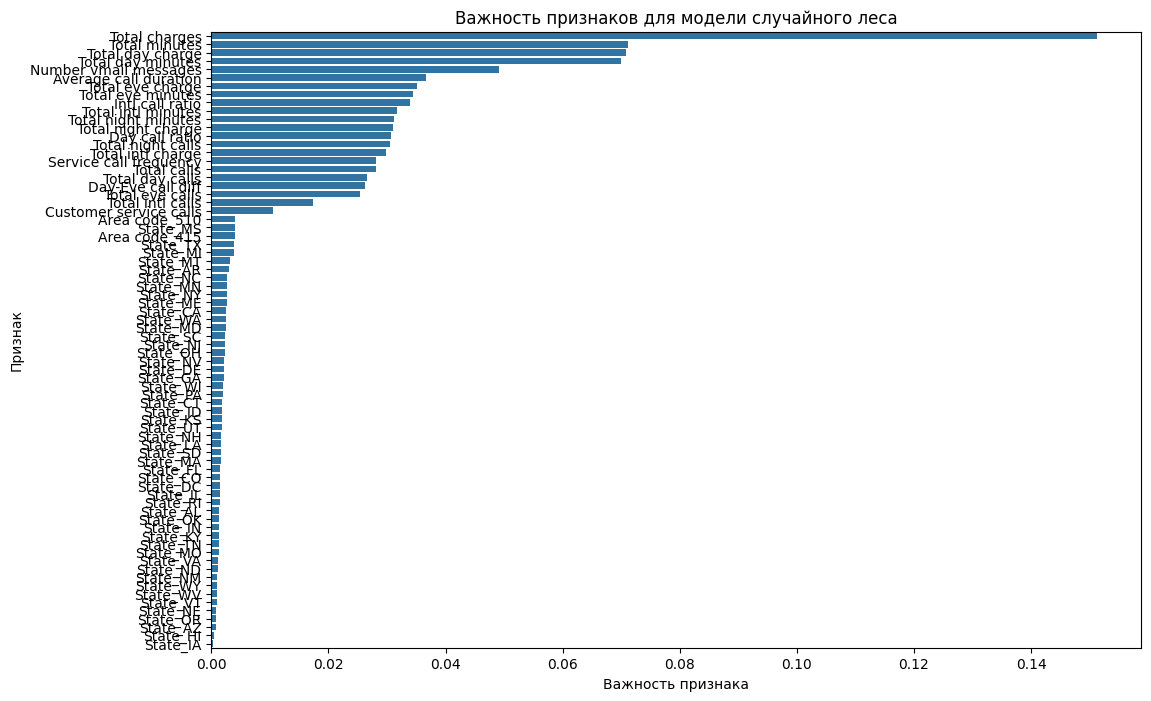

In [ ]:
# Визуализируем важность признаков с лучшей моделью
import matplotlib.pyplot as plt
import seaborn as sns

# Извлекаем важность признаков
importances = grid_search.best_estimator_.feature_importances_
features = X.columns  # Используем названия признаков

# Создаем DataFrame для визуализации
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Важность признаков для модели случайного леса')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

In [ ]:
# Удаление признаков 'State' и 'Area code' т.к. они "зашумляют" модель
df_folded.drop(['State'], axis=1, inplace=True)

# Убедимся, что dummy переменные для 'Area code' удалены
columns_to_remove = [col for col in df_folded.columns if 'Area code' in col]
df_folded.drop(columns=columns_to_remove, axis=1, inplace=True)


In [ ]:
# Разделение данных на признаки и целевую переменную
X = df_folded.drop('Churn', axis=1)  # Удаляем целевую переменную
y = df_folded['Churn']               # Целевая переменная

In [ ]:
# Параметры для настройки случайного леса
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Создаем модель случайного леса
rf = RandomForestClassifier(random_state=42)

# Настройка гиперпараметров с кросс-валидацией
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Вывод лучших параметров и точности
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая точность: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшие параметры:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Лучшая точность:  0.9072959015987502


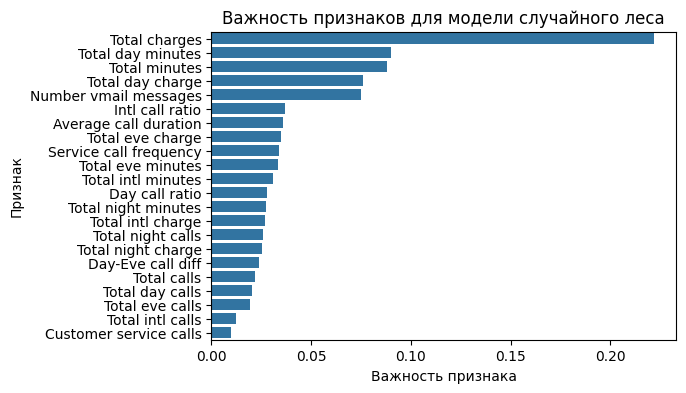

In [ ]:
# Визуализация важности признаков после удаления 'State' и 'Area code'
importances = grid_search.best_estimator_.feature_importances_
features = X.columns

# Создаем DataFrame для визуализации
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Важность признаков для модели случайного леса')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

In [ ]:
print(feature_importance_df)

                   Feature  Importance
16           Total charges    0.221990
1        Total day minutes    0.089933
14           Total minutes    0.088223
3         Total day charge    0.076166
0    Number vmail messages    0.075200
18         Intl call ratio    0.036724
17   Average call duration    0.035755
6         Total eve charge    0.034986
21  Service call frequency    0.033938
4        Total eve minutes    0.033512
10      Total intl minutes    0.031132
19          Day call ratio    0.028087
7      Total night minutes    0.027513
12       Total intl charge    0.026957
8        Total night calls    0.026062
9       Total night charge    0.025398
20       Day-Eve call diff    0.024161
15             Total calls    0.022092
2          Total day calls    0.020237
5          Total eve calls    0.019419
11        Total intl calls    0.012533
13  Customer service calls    0.009979


In [ ]:
# Удаление лишних пробелов из названий признаков
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.strip()

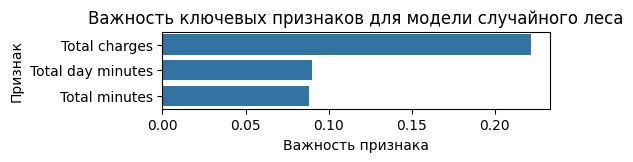

In [ ]:
# Визуализация важности ключевых признаков
key_features = ['Total charges', 'Total day minutes', 'Total minutes']

plt.figure(figsize=(5, 1))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[feature_importance_df['Feature'].isin(key_features)])
plt.title('Важность ключевых признаков для модели случайного леса')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

In [ ]:
# Проверка названий столбцов в DataFrame
print(df_folded.columns.tolist())

['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn', 'Total minutes', 'Total calls', 'Total charges', 'Average call duration', 'Intl call ratio', 'Day call ratio', 'Day-Eve call diff', 'Service call frequency']


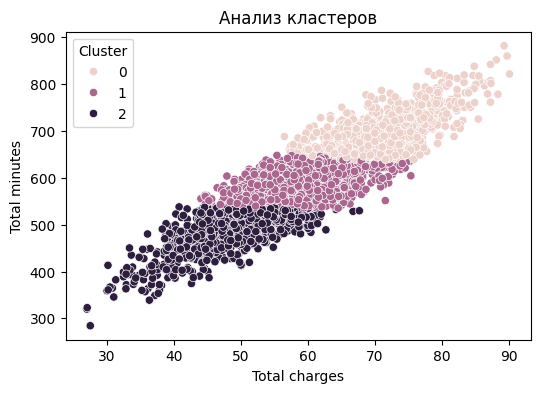

In [ ]:
from sklearn.cluster import KMeans

df_clusters = df_folded.copy()

kmeans = KMeans(n_clusters=3, random_state=42)  # Укажите количество кластеров
df_clusters['Cluster'] = kmeans.fit_predict(df_folded.drop('Churn', axis=1))

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Total charges', y='Total minutes', hue='Cluster', data=df_clusters)
plt.title('Анализ кластеров')
plt.show()


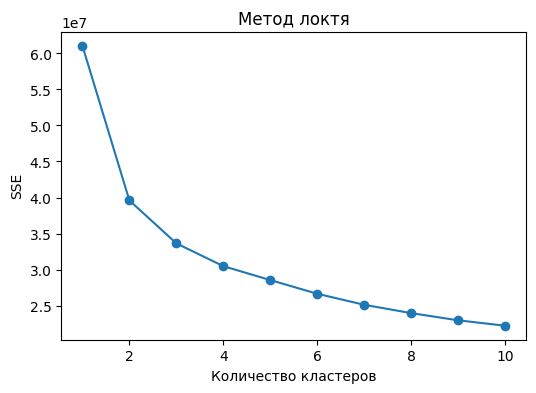

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df_clusters['Churn'] = df_clusters['Churn'].astype(int)  # Преобразуем True/False в 1/0

# Поиск оптимального количества кластеров методом локтя
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_folded.drop('Churn', axis=1))
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.title('Метод локтя')
plt.show()

3 кластера — это оптимальный выбор

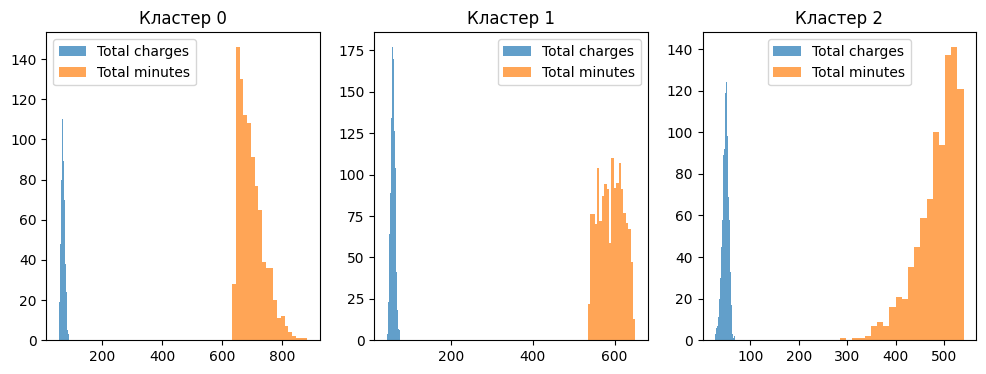

In [ ]:
# Гистограммы для каждого кластера
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    cluster_data = df_clusters[df_clusters['Cluster'] == i]
    plt.hist(cluster_data['Total charges'], bins=20, alpha=0.7, label='Total charges')
    plt.hist(cluster_data['Total minutes'], bins=20, alpha=0.7, label='Total minutes')
    plt.title(f'Кластер {i}')
    plt.legend()
plt.show()

Cluster
0    0.253506
1    0.089415
2    0.126554
Name: Churn, dtype: float64


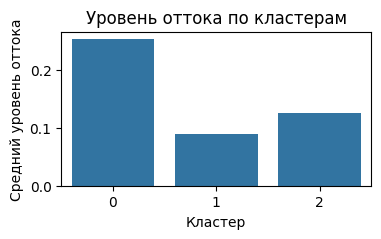

In [ ]:
# Анализ оттока по кластерам
df_clusters['Churn'] = df_clusters['Churn'].astype(int)  # Преобразуем True/False в 1/0

churn_rate = df_clusters.groupby('Cluster')['Churn'].mean()
print(churn_rate)

# Визуализация оттока по кластерам
plt.figure(figsize=(4,2))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.xlabel('Кластер')
plt.ylabel('Средний уровень оттока')
plt.title('Уровень оттока по кластерам')
plt.show()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from google.colab import files
uploaded = files.upload()
df_ensembled = pd.read_csv("telecom_churn.csv")
df_ensembled['Churn'] = df_ensembled['Churn'].map({True: 1, False: 0})

# Удаление ненужных столбцов
df_ensembled.drop(['International plan', 'Voice mail plan', 'Account length', 'Area code', 'State'], axis=1, inplace=True)

# Создание новых признаков
df_ensembled['Total minutes'] = (df_ensembled['Total day minutes'] +
                                   df_ensembled['Total eve minutes'] +
                                   df_ensembled['Total night minutes'] +
                                   df_ensembled['Total intl minutes'])

df_ensembled['Total calls'] = (df_ensembled['Total day calls'] +
                                 df_ensembled['Total eve calls'] +
                                 df_ensembled['Total night calls'] +
                                 df_ensembled['Total intl calls'])

df_ensembled['Total charges'] = (df_ensembled['Total day charge'] +
                                   df_ensembled['Total eve charge'] +
                                   df_ensembled['Total night charge'] +
                                   df_ensembled['Total intl charge'])

# Проверка наличия 'Total calls' перед созданием новых признаков
if 'Total calls' in df_ensembled.columns and df_ensembled['Total calls'].sum() > 0:
    df_ensembled['Average call duration'] = df_ensembled['Total minutes'] / df_ensembled['Total calls']
    df_ensembled['Intl call ratio'] = df_ensembled['Total intl calls'] / df_ensembled['Total calls']
    df_ensembled['Day call ratio'] = df_ensembled['Total day calls'] / df_ensembled['Total calls']
    df_ensembled['Day-Eve call diff'] = df_ensembled['Total day calls'] - df_ensembled['Total eve calls']
    df_ensembled['Service call frequency'] = df_ensembled['Customer service calls'] / df_ensembled['Total calls']

# Проверка финального DataFrame
print(df_ensembled.head())
# Разделение данных на обучающую и тестовую выборки
X = df_ensembled.drop('Churn', axis=1)  # Признаки
y = df_ensembled['Churn']  # Целевая переменная (отток)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение базовых моделей с обновлением SVM
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42, kernel='rbf', C=1.0, class_weight='balanced')),
]

# Мета-модель
meta_model = LogisticRegression()

# Создание ансамбля стеккинга
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5  # Кросс-валидация для стеккинга
)

# Обучение ансамбля
stacking_clf.fit(X_train, y_train)

# Предсказание и оценка
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy ансамбля стеккинга: {accuracy:.4f}')

Saving telecom_churn.csv to telecom_churn.csv
   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  ...  \
0                244.7              

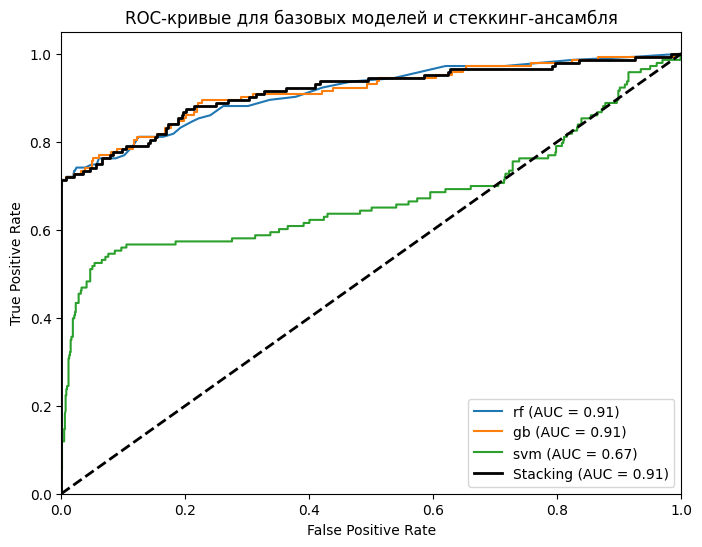

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение стеккинг модели
stacking_clf.fit(X_train, y_train)

# Построение ROC-кривых
plt.figure(figsize=(8, 6))

# Визуализация для каждой базовой модели
for name, model in base_learners:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Визуализация для стеккинг-модели
y_pred_proba_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_stacking)
roc_auc_stacking = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Stacking (AUC = {roc_auc_stacking:.2f})', color='black', linewidth=2)

# Оформление графика
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для базовых моделей и стеккинг-ансамбля')
plt.legend(loc='lower right')
plt.show()

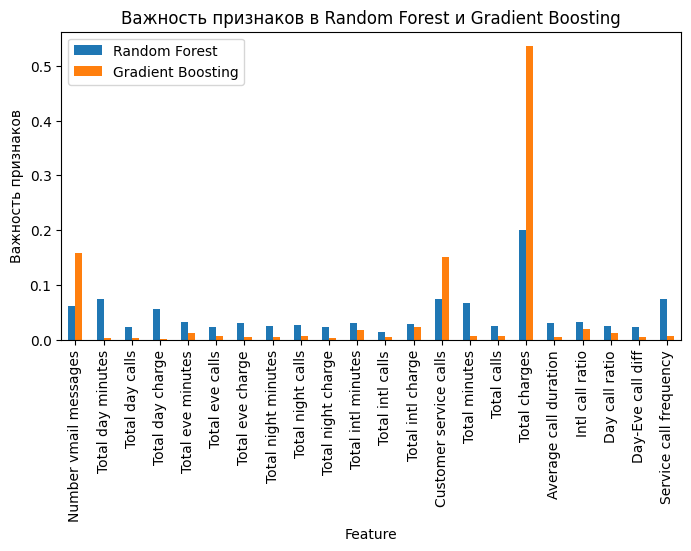

In [3]:
import pandas as pd
import numpy as np

# Извлечение важности признаков из моделей, которые её поддерживают
rf_feature_importances = stacking_clf.named_estimators_['rf'].feature_importances_
gb_feature_importances = stacking_clf.named_estimators_['gb'].feature_importances_

# Создание DataFrame с важностью признаков
feature_names = X_train.columns
df_feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_feature_importances,
    'Gradient Boosting': gb_feature_importances
})

# Визуализация
df_feature_importances.set_index('Feature').plot(kind='bar', figsize=(8,4))
plt.title('Важность признаков в Random Forest и Gradient Boosting')
plt.ylabel('Важность признаков')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

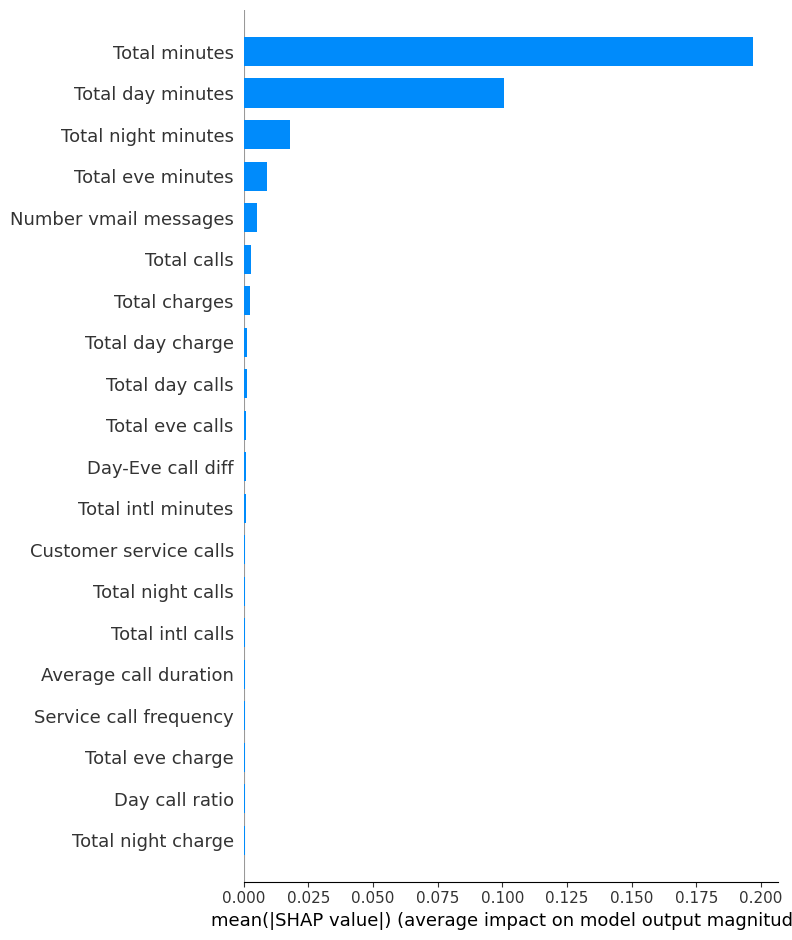

In [8]:
import shap
import matplotlib.pyplot as plt

# Обучаем SVM отдельно
svm_model = stacking_clf.named_estimators_['svm']
svm_model.fit(X_train, y_train)

# Уменьшение числа фоновых данных с использованием метода K-средних с 5 кластерами
X_train_kmeans = shap.kmeans(X_train, 5)

# Повторная инициализация объяснителя с кластеризованными фоновыми данными
explainer = shap.KernelExplainer(svm_model.predict, X_train_kmeans)

# Рассчитываем SHAP значения для тестовых данных
shap_values = explainer.shap_values(X_test)

# Визуализация
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Функция для вывода метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"Метрики для модели {model_name}:")
    print(f"Точность: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")
    print("")

# Обучение и оценка базовых моделей
for name, model in base_learners:
    model.fit(X_train, y_train)  # Обучение базовой модели
    y_pred = model.predict(X_test)
    print_metrics(y_test, y_pred, name)

# Оценка стеккинг-ансамбля (он уже обучен)
y_pred_stacking = stacking_clf.predict(X_test)
print_metrics(y_test, y_pred_stacking, 'Stacking')

Метрики для модели rf:
Точность: 0.96
Precision: 0.97
Recall: 0.71
F1-Score: 0.82

Метрики для модели gb:
Точность: 0.95
Precision: 0.96
Recall: 0.71
F1-Score: 0.82

Метрики для модели svm:
Точность: 0.85
Precision: 0.48
Recall: 0.56
F1-Score: 0.52

Метрики для модели Stacking:
Точность: 0.96
Precision: 0.98
Recall: 0.71
F1-Score: 0.83



__Кластер 0:__
Эти клиенты имеют низкие затраты, но высокое использование минут. Возможно, они выбирают тарифные планы с низкими фиксированными затратами, но активно пользуются услугами.
Уровень оттока: 0.2535 (около 25.35%).

Это самый высокий уровень оттока среди всех кластеров. Необходимо обратить внимание на клиентов в этом кластере и провести дополнительный анализ, чтобы понять причины их ухода. Возможно, им не хватает удовлетворенности от предоставляемых услуг или тарифов.

__Кластер 1:__
Клиенты с низкими затратами, но более разнообразным использованием минут. Возможно, они изменяют свое поведение в зависимости от обстоятельств или выбирают разные дополнительные опции.
Уровень оттока: 0.0894 (около 8.94%).

Это самый низкий уровень оттока среди всех кластеров. Это может означать, что клиенты в этом кластере довольны услугами и тарифами, и их необходимо удерживать, предлагая дополнительные бонусы и программы лояльности.

__Кластер 2:__
Наиболее разнообразная группа с точки зрения использования минут. Возможно, включает как очень активных, так и пассивных пользователей.
Уровень оттока: 0.1265 (около 12.65%).

Уровень оттока выше, чем в Кластере 1, но ниже, чем в Кластере 0. Возможно, есть определенные факторы, которые влияют на решение клиентов покинуть компанию. Необходимо провести дополнительный анализ, чтобы понять эти факторы и предложить меры для их удержания.